In [15]:
import imp # for reloading modules
import matplotlib.pyplot as plt # for plotting

import utils # for loading data
imp.reload(utils)

<module 'utils' from 'c:\\Users\\Christine Lagorce\\Desktop\\X M2\\ComputerVision\\utils.py'>

In [13]:
labels = utils.get_annotations('Data/data1/annotations')
images = utils.get_images('Data/data1/images')

Loading images...


c:\Users\Christine Lagorce\Desktop\X M2\ComputerVision\utils.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


TypeError: list indices must be integers or slices, not numpy.str_

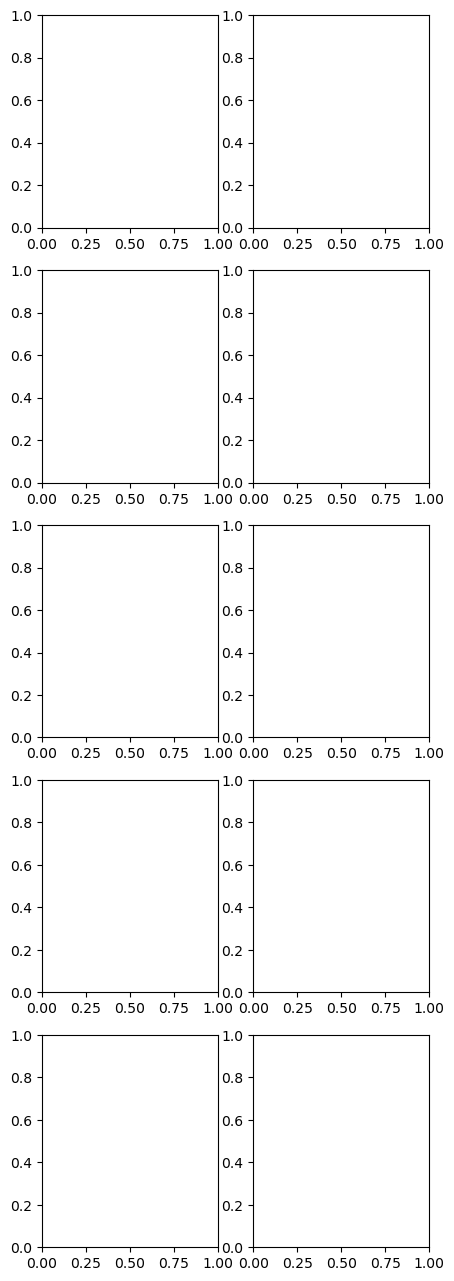

In [24]:
#we plot the first 8 images for each of the 10 class

#we set the figure size to 10x10

fig, axis = plt.subplots(5, 2, figsize=(5, 16))

progress = [0,0]

for i in range(100):
    label = labels[i]
    value = images[i]

    if progress[label] < 5:
        axis[progress[label], label].imshow(value)
        progress[label] += 1 